In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
can_income_data = pd.read_csv('canada_per_capita_income.csv')

In [3]:
can_income_data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


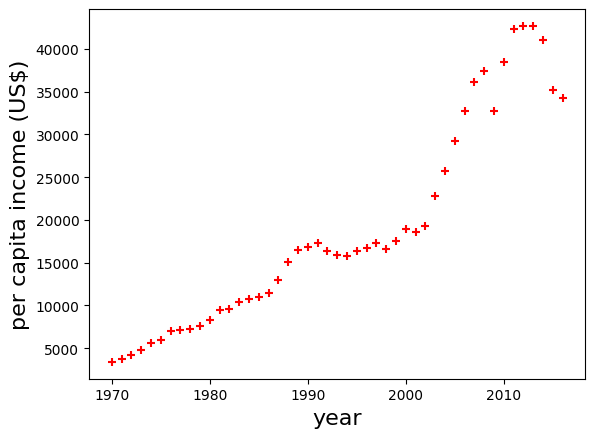

In [9]:
%matplotlib inline
plt.xlabel('year', fontsize=16)
plt.ylabel('per capita income (US$)', fontsize=16)
plt.scatter(can_income_data['year'],can_income_data['per capita income (US$)'], color='red', marker='+')
plt.show()

In [13]:
can_income_data_year = can_income_data.drop(columns=['per capita income (US$)'])
can_income_data_year.tail(3)

,year
44,2014
45,2015
46,2016


In [16]:
can_income_data_income = can_income_data['per capita income (US$)']
can_income_data_income.tail(3)

44    41039.89360
45    35175.18898
46    34229.19363
Name: per capita income (US$), dtype: float64

In [17]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(can_income_data_year,can_income_data_income)

LinearRegression()

In [19]:
prediction_input = pd.DataFrame([[2020]], columns=['year'])
lin_reg.predict(prediction_input)

array([41288.69409442])

In [20]:
new_year_can_income_data = pd.read_csv('canada_per_capita_income - new years.csv')

In [30]:
new_year_can_income_data.head(2)

,year
0,2017
1,2018


In [32]:
new_year_can_income_data.columns = ['year']
new_prediction = lin_reg.predict(new_year_can_income_data)
new_prediction

array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053])

In [33]:
new_year_can_income_data['per capita income (US$)'] = new_prediction
new_year_can_income_data

,year,per capita income (US$)
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471


In [34]:
new_year_can_income_data.to_csv("pred_canada_per_capita_income - new years.csv")

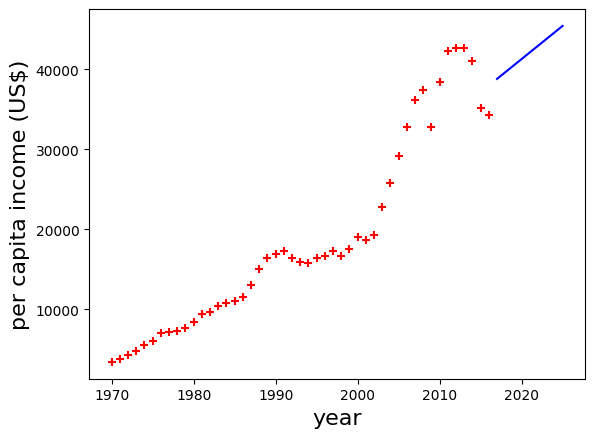

In [35]:
%matplotlib inline
plt.xlabel('year', fontsize=16)
plt.ylabel('per capita income (US$)', fontsize=16)
plt.scatter(can_income_data['year'],can_income_data['per capita income (US$)'], color='red', marker='+')
plt.plot(new_year_can_income_data['year'], new_year_can_income_data['per capita income (US$)'], color = 'blue')
plt.show()